d = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]}
dataset = pd.DataFrame(data=d)
dataset

# Simple Linear Regression

## Calculate Mean and Variance

In [2]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

In [4]:
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [6]:
# calculate mean and variance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


In [7]:
dataset

[[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

In [10]:
len(dataset)

5

## Calculate Covariance

In [13]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [15]:
# calculate covariance
#dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
#x = [row[0] for row in dataset]
#y = [row[1] for row in dataset]
#mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 8.000


## Estimate Coeficients

In [18]:
# Calculate coefficients
def coefficients(dataset):
    #x = [row[0] for row in dataset]
    #y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [19]:
# calculate coefficients
#dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.400, B1=0.800


## Make Predictions

In [20]:
# Example of Standalone Simple Linear Regression
from math import sqrt

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

# Test simple linear regression
#dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))


[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


# compare

master_ml/lineal_regression/

Build_prediction_model_lineal_regression_ML-mastery-Copy1

In [1]:
import pandas as pd
import numpy as np
from statistics import mean

In [2]:
d2 = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset2 = pd.DataFrame(data=d2)
dataset2

,x,y
0,1,1
1,2,2
2,3,3
3,4,3
4,5,5


In [3]:
mean_x = mean(dataset2['x'])
mean_x

3

In [4]:
mean_y = mean(dataset2['y'])
mean_y

2.8

## Correlation

In [5]:
# Calculate the correlation
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [6]:
print(pearson_def([1,2,3,4,5], [1,2,3,3,5]))

0.9594032236002469


In [7]:
# Calculate the standard deviation x
std_x = np.std(dataset2['x'])
std_x

1.4142135623730951

In [8]:
# calculate standard daviation y
std_y = np.std(dataset2['y'])
std_y 

1.32664991614216

In [9]:
B1 = pearson_def([1,2,3,4,5], [1,2,3,3,5]) * (std_y / std_x)
B1

0.8999999999999999

In [10]:
B0 = mean_y - B1 * mean_x
B0

0.10000000000000009

## Prediction New dataset

In [11]:
data_x = np.arange(6,11)
data_x

array([ 6,  7,  8,  9, 10])

In [12]:
data_y = []
for i in data_x:
    y_ = B0 + B1 * i    
    data_y.append(y_)

print(data_y)

[5.5, 6.399999999999999, 7.299999999999999, 8.2, 9.1]


In [13]:
df = pd.DataFrame({'x': data_x,
                   'y': data_y})

In [14]:
df_ = df.round()
df_

,x,y
0,6,6.0
1,7,6.0
2,8,7.0
3,9,8.0
4,10,9.0


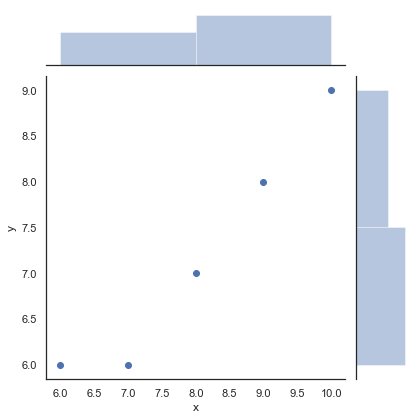

In [20]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
p = sns.jointplot(data=df_,x='x', y='y')

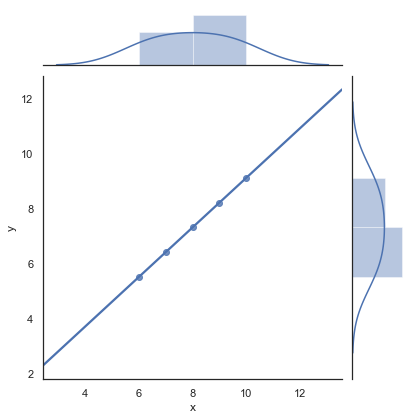

In [17]:
 g = sns.jointplot("x", "y", data=df, kind="reg")

In [22]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(df_['y'], df['y'])
print('RMSE: %.3f' % (rmse))


RMSE: 0.110
